# Análise de Missões Espaciais ao Longo dos Anos

Nesta análise, exploraremos relatórios detalhados de missões espaciais realizadas ao longo dos anos. O objetivo é extrair insights valiosos que possam fornecer uma compreensão mais profunda das conquistas, desafios e tendências no campo das explorações espaciais. Através da análise de dados meticulosa, buscamos revelar padrões e informações significativas que contribuam para o entendimento do progresso e da evolução das missões espaciais. Vamos embarcar nessa jornada de descobertas e análises para ampliar nosso conhecimento sobre as atividades espaciais.


# Pré-processamento de Dados

Antes de começarmos a análise propriamente dita, é crucial realizar o pré-processamento dos dados. Este passo é essencial para garantir que os dados estejam limpos, organizados e prontos para serem explorados.

In [61]:
'''
antes de tudo, vamos fazer um tratamento nos dados da planilha, retirar tudo que não vamos iniciar, para posteriormente começar a responder.
nome da planilha é space_missions1.csv, vamos puxar ela para tratar os dados. então vamos começar importando as bibliotecas necessarias nesse projeto
para ler os dados da planilha, vamos usar a biblioteca pandas, e para fazer os graficos, vamos usar a biblioteca matplotlib.pyplot
'''
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv('space_missions1.csv') #vamos ler a planilha e atribuir a variavel tabela
display(tabela) #vamos mostrar a tabela para ver como ela está

tabela.info() #vamos ver as informações da tabela, para ver se temos dados faltantes

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1
...,...,...,...,...,...,...,...,...,...
4621,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2001,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2383
4622,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2004,1899-12-30 06:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2405
4623,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2006,1899-12-30 04:00:00,Tsyklon-2,1,Retired,NaN,Cosmos 2421
4624,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991,1899-12-30 03:54:00,Tsyklon-3,1,Retired,NaN,Intercosmos 25 & Magion 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4626 non-null   object 
 1   Location       4626 non-null   object 
 2   Year           4626 non-null   int64  
 3   Time           4501 non-null   object 
 4   Rocket         4626 non-null   object 
 5   MissionStatus  4626 non-null   int64  
 6   RocketStatus   4626 non-null   object 
 7   Price          1264 non-null   float64
 8   Mission        4626 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 325.4+ KB


In [62]:
#analisando melhor a tabela, já vejo que vamos excluir algumas colunas que são desnecessarias para responder as perguntas.
#vamos remover a coluna (Time	Rocket	MissionStatus	RocketStatus	Price	Mission)

tabela = tabela.drop(['Time', 'Rocket', 'MissionStatus', 'RocketStatus', 'Price', 'Mission'], axis=1) #vamos remover as colunas que não vamos usar
display(tabela) #vamos mostrar a tabela para ver como ela está

tabela.info() #vamos ver as informações da tabela, para ver se temos dados faltantes

,Company,Location,Year
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958
...,...,...,...
4621,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2001
4622,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2004
4623,VKS RF,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",2006
4624,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   4626 non-null   object
 1   Location  4626 non-null   object
 2   Year      4626 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 108.6+ KB


## Pergunta 1: Quantas vezes cada empresa levou foguetes para o espaço?

Nesta análise, buscaremos determinar a frequência com que cada empresa realizou lançamentos espaciais. Queremos entender a distribuição dos esforços entre as diferentes organizações no contexto das missões espaciais.


Company
RVSN USSR           1777
CASC                 337
Arianespace          293
General Dynamics     251
VKS RF               215
                    ... 
GK LS                  1
Firefly                1
EER                    1
Douglas                1
CAS Space              1
Name: count, Length: 62, dtype: int64

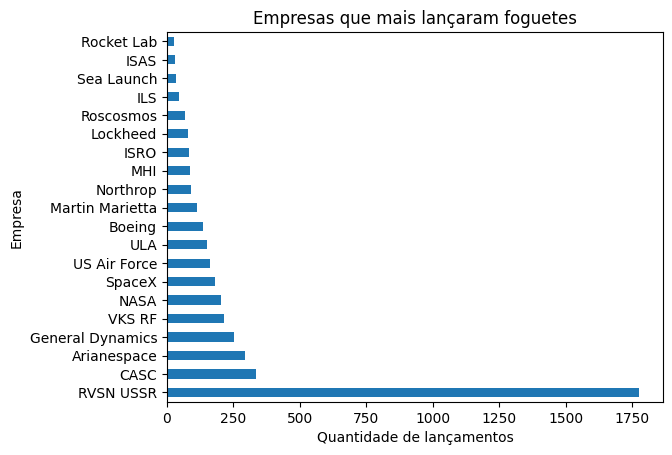

In [63]:
#agora para responder a pergunta acima, vamos agrupar os dados por Company, e ver quantas vezes cada uma aparece

tabela['Company'].value_counts() #vamos agrupar os dados por Company, e ver quantas vezes cada uma aparece

display(tabela['Company'].value_counts()) #vamos mostrar a tabela para ver como ela está

#vamos criar um grafico de barras na horizontal, e mostrar apenas as 20 primeiras empresas que mais lançaram foguetes

tabela['Company'].value_counts().head(20).plot.barh() #vamos criar um grafico de barras na horizontal, e mostrar apenas as 20 primeiras empresas que mais lançaram foguetes
plt.title('Empresas que mais lançaram foguetes') #vamos colocar um titulo no grafico
plt.xlabel('Quantidade de lançamentos') #vamos colocar um nome no eixo x
plt.ylabel('Empresa') #vamos colocar um nome no eixo y
plt.show() #vamos mostrar o grafico

"RVSN" refere-se ao termo russo "Raketnye Voyska Strategicheskogo Naznacheniya" (em russo: Ракетные войска стратегического назначения), que em português significa "Forças de Mísseis Estratégicos". Essa designação está associada às forças militares responsáveis pelos mísseis balísticos estratégicos na Rússia.

A "USSR" é a sigla em inglês para a "União das Repúblicas Socialistas Soviéticas", que foi um país que existiu até o seu colapso em 1991. Antes do colapso, a União Soviética (URSS) era uma potência espacial significativa e desempenhou um papel importante nas primeiras conquistas espaciais, como o lançamento do primeiro satélite artificial, o Sputnik 1, em 1957, e o envio do primeiro ser humano ao espaço, Yuri Gagarin, em 1961.

## Pergunta 2: Quantos lançamentos de foguetes já ocorreram ao longo da história?

Vamos investigar o número total de lançamentos de foguetes desde o início das atividades espaciais. Esta análise visa proporcionar uma visão abrangente do volume de atividades espaciais registradas ao longo dos anos.


Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2018    117
2019    109
2020    119
2021    157
2022     93
Name: count, Length: 66, dtype: int64

O total de lançamentos de todos os anos é: 4626


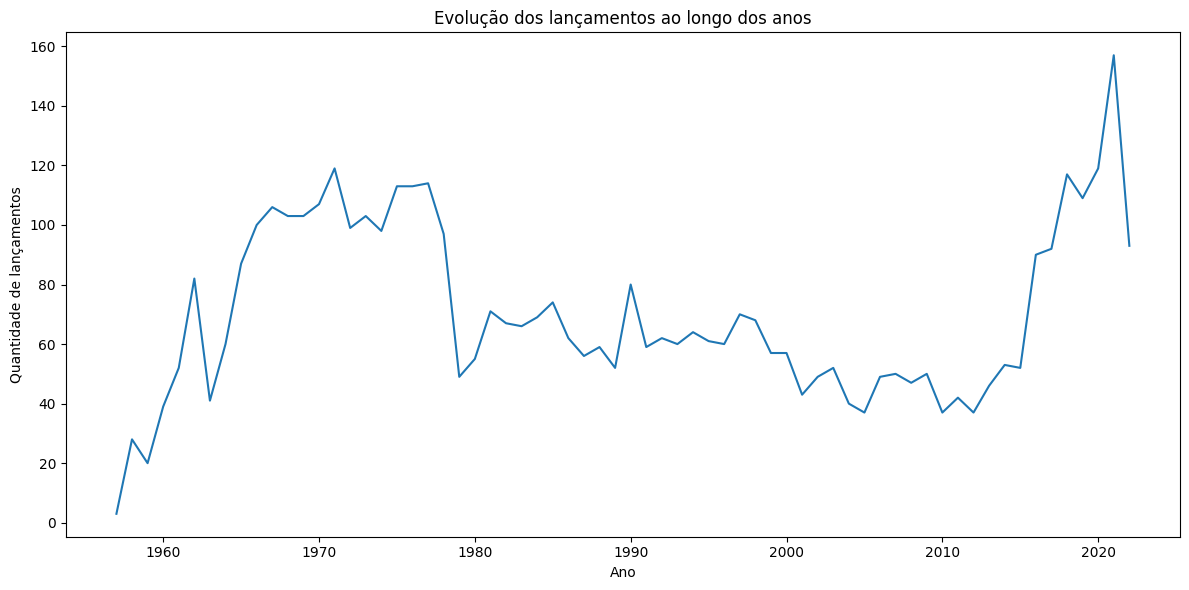

In [67]:
# vamos somar quanto cada vez que um ano aparece na tabela
total_lancamentos = tabela['Year'].value_counts().sum() #vamos somar quanto cada vez que um ano aparece na tabela
total_lancamentos

#agora vamos criar um grafico de linha para mostrar a evolução dos lançamentos ao longo dos anos

# vamos somar quantas vezes cada ano aparece na tabela
total_lancamentos = tabela['Year'].value_counts().sort_index()

# criar a figura e os subplots
fig, ax1 = plt.subplots(figsize=(12,6))

# plotar o gráfico de linha no primeiro subplot
total_lancamentos.plot(kind='line', ax=ax1)
ax1.set_title('Evolução dos lançamentos ao longo dos anos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de lançamentos')

# ajustar o layout para ocupar todo o espaço disponível
plt.tight_layout()

display(total_lancamentos) #vamos mostrar a tabela para ver como ela está
total = total_lancamentos.sum()
print(f"\033[1;32mO total de lançamentos de todos os anos é: {total}\033[0m")

# exibir o gráfico
plt.show()


## Pergunta 3: Quais são as principais empresas que realizaram os lançamentos? (Ranking)

Nesta análise, pretendemos identificar e classificar as principais empresas responsáveis pelos lançamentos espaciais. Queremos entender a liderança e contribuição relativa de cada empresa para as atividades espaciais.


## Pergunta 4: Qual foi o ano com o maior número de lançamentos de foguetes?

Vamos examinar os dados para determinar qual ano registrou o maior volume de atividades de lançamento espacial. Essa análise nos ajudará a identificar períodos de intensa atividade na exploração espacial.


## Pergunta 5: Quais são os locais que mais tiveram lançamentos de foguetes?

Esta análise visa identificar os locais geográficos que se destacam em termos de frequência de lançamentos espaciais. Queremos entender as regiões que foram mais ativas nas atividades de exploração espacial.
